In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [4]:
train_df = pd.read_csv('fraudtrain.csv')
test_df = pd.read_csv('fraudtest.csv')

In [6]:
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
train_df['dob'] = pd.to_datetime(train_df['dob'])
train_df['trans_date_trans_time'] = train_df['trans_date_trans_time'].astype(np.int64) // 10**9
train_df['dob'] = train_df['dob'].astype(np.int64) // 10**9

In [8]:
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
test_df['dob'] = pd.to_datetime(test_df['dob'])
test_df['trans_date_trans_time'] = test_df['trans_date_trans_time'].astype(np.int64) // 10**9
test_df['dob'] = test_df['dob'].astype(np.int64) // 10**9

In [10]:
print("Train columns:", train_df.columns.tolist())
print("Test columns:", test_df.columns.tolist())

Train columns: ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
Test columns: ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


In [12]:
features_to_drop = ['is_fraud', 'cc_num', 'trans_num', 'zip']
X_train = train_df.drop(columns=[col for col in features_to_drop if col in train_df.columns], errors='ignore')
y_train = train_df['is_fraud']
X_test = test_df.drop(columns=[col for col in features_to_drop if col in test_df.columns], errors='ignore')
y_test = test_df['is_fraud']

In [14]:
categorical_features = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job']
numeric_features = ['trans_date_trans_time', 'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'dob']

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [22]:
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression(max_iter=50))])

pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', DecisionTreeClassifier(max_depth=5, random_state=42))])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42, n_jobs=-1))])

In [24]:
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

In [26]:
pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_test)

In [28]:
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

In [30]:
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")

Logistic Regression Accuracy: 0.9956128906875598
Decision Tree Accuracy: 0.9972000237530119
Random Forest Accuracy: 0.9961401355721147


In [32]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

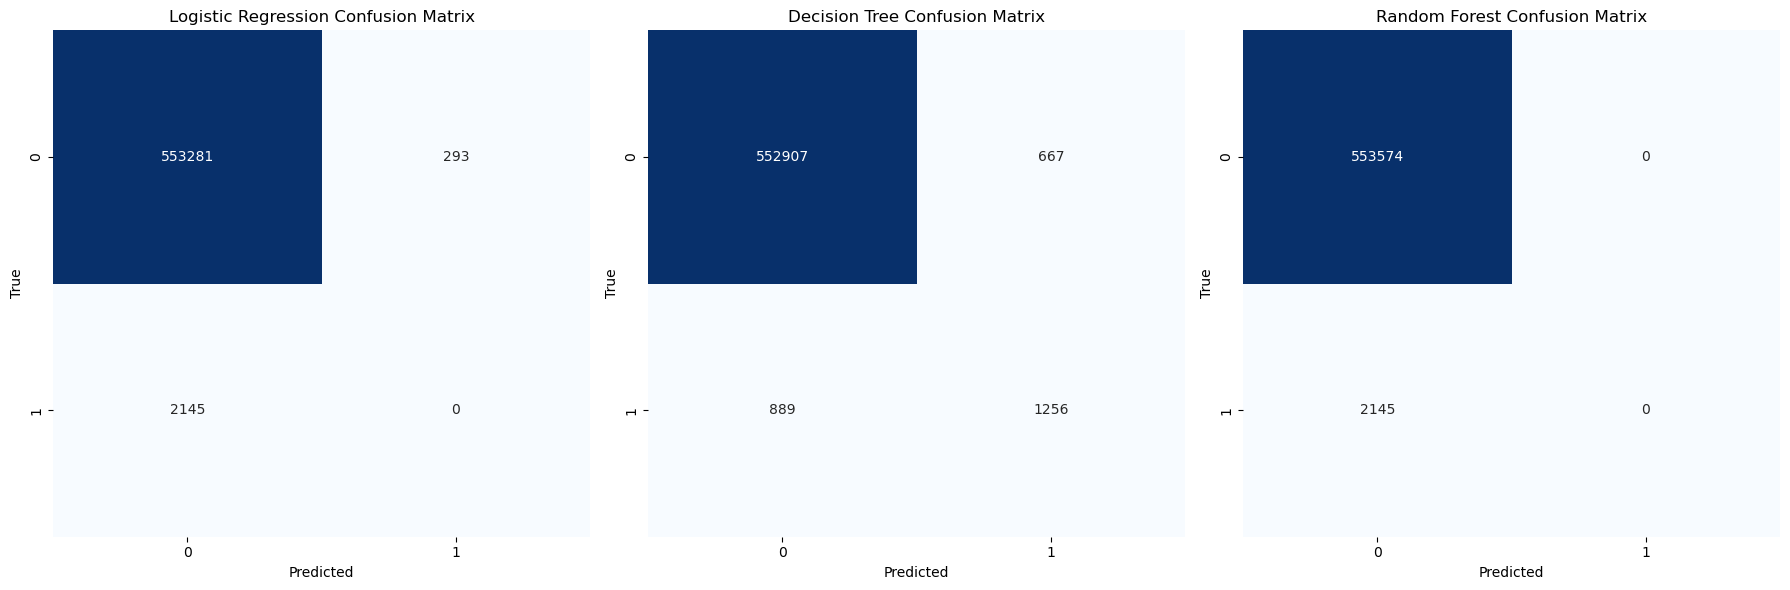

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(conf_matrix_lr, annot=True, fmt='d', ax=axes[0], cmap="Blues", cbar=False)
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(conf_matrix_dt, annot=True, fmt='d', ax=axes[1], cmap="Blues", cbar=False)
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', ax=axes[2], cmap="Blues", cbar=False)
axes[2].set_title('Random Forest Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

plt.tight_layout()
plt.show()

In [36]:
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Classification Report:


NameError: name 'classification_report' is not defined